In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import copy

from snownlp import SnowNLP

In [5]:
df = pd.read_csv("data/train.csv")
df.tail(50)

,Id,Address,Sold Price,Summary,Type,Year built,Heating,Cooling,Parking,Lot,...,Parking features,Tax assessed value,Annual tax amount,Listed On,Listed Price,Last Sold On,Last Sold Price,City,Zip,State
47389,47389,413 Loma Vista St,1995000.0,"413 Loma Vista St, El Segundo, CA 90245 is a s...",SingleFamily,1928.0,Forced air,See Remarks,"Garage, Garage - Detached, Covered",6400.0,...,"Garage, Garage - Detached, Covered",1537608.0,17595.0,2018-02-28,1399000.0,2018-04-10,1468000.0,El Segundo,90245,CA
47390,47390,42945 Yucca Valley Rd,382000.0,Escape the crowds and get back to nature! Thi...,MobileManufactured,2018.0,Forced Air,Evaporative Cooling,RV Access/Parking,NaN,...,RV Access/Parking,190633.0,2158.0,2020-08-13,389000.0,NaN,NaN,Anza,92539,CA
47391,47391,2889 17 Mile Dr,4375000.0,Situated on the coveted 17-Mile Drive and perc...,SingleFamily,2020.0,Radiant Floors,None,"Garage - Attached, Off-street",9700.0,...,"Garage - Attached, Off-street",3400500.0,38043.0,2020-10-16,4688000.0,NaN,NaN,Pebble Beach,93953,CA
47392,47392,562 Westbourne Dr,2750000.0,Presenting this slick Architectural at a subst...,SingleFamily,1925.0,Central,Central Air,"Driveway, Gated",3964.0,...,"Driveway, Gated",2197873.0,26801.0,2020-10-27,2985000.0,2015-03-05,2000000.0,Los Angeles,90048,CA
47393,47393,3635 Auburn Folsom Rd,2025000.0,"3635 Auburn Folsom Rd, Loomis, CA 95650 is a s...",SingleFamily,1980.0,"Propane, Zoned, Central, Fireplace Insert",Central Air,"Garage, Garage - Attached, Covered",609840.0,...,"Garage, Garage - Attached, Covered",983753.0,10569.0,2020-05-26,2350000.0,2000-02-04,700000.0,Loomis,95650,CA
47394,47394,5517-5515 Hastings St,600000.0,Excellent opportunity to own a single story du...,MultiFamily,1924.0,NaN,See Remarks,NaN,NaN,...,NaN,NaN,NaN,2020-08-28,630000.0,NaN,NaN,Los Angeles,90022,CA
47395,47395,221 N 3rd St,535000.0,"221 N 3rd St, Patterson, CA 95363 is a single ...",SingleFamily,1930.0,"Natural Gas, Central, MultiUnits","Central Air, Multi Units","Garage, Garage - Detached, Covered",13939.2,...,"Garage, Garage - Detached, Covered",324182.0,3638.0,2020-11-03,589000.0,2014-11-21,295000.0,Patterson,95363,CA
47396,47396,1907 P St,950000.0,"1907 P St, Sacramento, CA 95811 is a multi fam...",MultiFamily,1880.0,MultiUnits,Central Air,0 spaces,NaN,...,NaN,289323.0,3832.0,2020-10-28,949900.0,2020-03-06,550000.0,Sacramento,95811,CA
47397,47397,980 Sunnyhills Rd,1550000.0,Crocker Highlands Traditional abundant with pe...,SingleFamily,1923.0,"Forced Air, Natural Gas",None,"Garage Door Opener, Detached",5227.2,...,"Garage Door Opener, Detached",1031604.0,15081.0,2020-02-10,1095000.0,2020-07-17,1550000.0,Oakland,94610,CA
47398,47398,2667 Sterling Ave,308000.0,"2667 Sterling Ave, Sanger, CA 93657 is a singl...",SingleFamily,2000.0,Forced air,Central,"Garage, Garage - Attached, Covered",8123.0,...,"Garage, Garage - Attached, Covered",153691.0,1903.0,2020-10-02,315000.0,2012-04-06,136500.0,Sanger,93657,CA


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47439 entries, 0 to 47438
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           47439 non-null  int64  
 1   Address                      47439 non-null  object 
 2   Sold Price                   47439 non-null  float64
 3   Summary                      47089 non-null  object 
 4   Type                         47439 non-null  object 
 5   Year built                   46394 non-null  float64
 6   Heating                      40974 non-null  object 
 7   Cooling                      36817 non-null  object 
 8   Parking                      46531 non-null  object 
 9   Lot                          33258 non-null  float64
 10  Bedrooms                     44567 non-null  object 
 11  Bathrooms                    43974 non-null  float64
 12  Full bathrooms               39574 non-null  float64
 13  Total interior l

In [3]:
df.head()

,Id,Address,Sold Price,Summary,Type,Year built,Heating,Cooling,Parking,Lot,...,Parking features,Tax assessed value,Annual tax amount,Listed On,Listed Price,Last Sold On,Last Sold Price,City,Zip,State
0,0,540 Pine Ln,3825000.0,"540 Pine Ln, Los Altos, CA 94022 is a single f...",SingleFamily,1969.0,"Heating - 2+ Zones, Central Forced Air - Gas","Multi-Zone, Central AC, Whole House / Attic Fan","Garage, Garage - Attached, Covered",1.0,...,"Garage, Garage - Attached, Covered",886486.0,12580.0,2019-10-24,4198000.0,NaN,NaN,Los Altos,94022,CA
1,1,1727 W 67th St,505000.0,"HURRY, HURRY.......Great house 3 bed and 2 bat...",SingleFamily,1926.0,Combination,"Wall/Window Unit(s), Evaporative Cooling, See ...","Detached Carport, Garage",4047.0,...,"Detached Carport, Garage",505000.0,6253.0,2019-10-16,525000.0,2019-08-30,328000.0,Los Angeles,90047,CA
2,2,28093 Pine Ave,140000.0,'THE PERFECT CABIN TO FLIP! Strawberry deligh...,SingleFamily,1958.0,Forced air,NaN,0 spaces,9147.0,...,NaN,49627.0,468.0,2019-08-25,180000.0,NaN,NaN,Strawberry,95375,CA
3,3,10750 Braddock Dr,1775000.0,Rare 2-story Gated 5 bedroom Modern Mediterran...,SingleFamily,1947.0,Central,Central Air,"Detached Carport, Driveway, Garage - Two Door",NaN,...,"Detached Carport, Driveway, Garage - Two Door",1775000.0,20787.0,2019-10-24,1895000.0,2016-08-30,1500000.0,Culver City,90230,CA
4,4,7415 O Donovan Rd,1175000.0,Beautiful 200 acre ranch land with several pas...,VacantLand,NaN,NaN,NaN,0 spaces,NaN,...,NaN,NaN,NaN,2019-06-07,1595000.0,2016-06-27,900000.0,Creston,93432,CA


In [7]:
df["Type"].unique()

array(['SingleFamily', 'VacantLand', 'Unknown', 'Condo', 'Townhouse',
       'Apartment', 'MultiFamily', 'MobileManufactured',
       '3 Story, Duplex', 'Flat, Attached', 'Detached, 3 Story',
       'Single Family', 'Mid-Rise (4-8)',
       'Top Floor, 2 Level, Semi-Attached', 'Cooperative', '31',
       '3 Story', 'Mid-Rise (4-8), Unit Below, 2 Level, Unit Above',
       'Luxury, Townhouse, 2 Level', 'Luxury, 2 Level',
       '3 Story, Triplex', '2 Story',
       'Luxury, New Construction, Mid-Rise (4-8), Top Floor, Townhouse, 2 Level, Penthouse',
       'Luxury, Low-Rise (1-3)', 'Acreage',
       'New Construction, Mid-Rise (4-8), Unit Above, 4+ Level',
       'Luxury, New Construction, Mid-Rise (4-8)', 'Hi-Rise (9+), Luxury',
       '1 Level, Luxury, New Construction, Top Floor, Penthouse',
       'Low-Rise (1-3), Live/Work', 'Ranch', 'RANCH',
       'Luxury, Top Floor, Low-Rise (1-3)', 'RURLRES, RECREAT',
       'Top Floor, 2 Level', 'MFD-F', 'Flat, Unit Above',
       '1 Level, To

In [ ]:
# One-hot 编码
# 小明，男
# 小红，男
# 小jin,第三性别
# 小明，1，0，0
# 小红，1，0，0
# 小jin,0，0，1

In [178]:
df.describe()
# float int 类型

,Id,Sold Price,Year built,Lot,Bathrooms,Full bathrooms,Total interior livable area,Total spaces,Garage spaces,Elementary School Score,Elementary School Distance,Middle School Score,Middle School Distance,High School Score,High School Distance,Tax assessed value,Annual tax amount,Listed Price,Last Sold Price,Zip
count,47439.000000,4.743900e+04,46394.000000,3.325800e+04,43974.000000,39574.000000,4.491300e+04,46523.000000,46522.000000,42543.000000,42697.000000,30734.000000,30735.000000,42220.000000,42438.000000,4.378700e+04,43129.000000,4.743900e+04,2.967300e+04,47439.000000
mean,23719.000000,1.296050e+06,1956.634888,2.353383e+05,2.355642,2.094961,5.774587e+03,1.567117,1.491746,5.720824,1.152411,5.317206,1.691593,6.134344,2.410366,7.863118e+05,9956.843817,1.315890e+06,8.078537e+05,93279.178587
std,13694.604047,1.694452e+06,145.802456,1.192507e+07,1.188805,0.963320,8.324363e+05,9.011608,8.964319,2.103350,2.332367,2.002768,2.462879,1.984711,3.596120,1.157796e+06,13884.254976,2.628695e+06,1.177903e+06,2263.459104
min,0.000000,1.005000e+05,0.000000,0.000000e+00,0.000000,1.000000,1.000000e+00,-15.000000,-15.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,85611.000000
25%,11859.500000,5.650000e+05,1946.000000,4.991000e+03,2.000000,2.000000,1.187000e+03,0.000000,0.000000,4.000000,0.300000,4.000000,0.600000,5.000000,0.800000,2.549615e+05,3467.000000,5.745000e+05,3.350000e+05,90220.000000
50%,23719.000000,9.600000e+05,1967.000000,6.502000e+03,2.000000,2.000000,1.566000e+03,1.000000,1.000000,6.000000,0.500000,5.000000,1.000000,6.000000,1.300000,5.475240e+05,7129.000000,9.490000e+05,5.980000e+05,94114.000000
75%,35578.500000,1.525000e+06,1989.000000,1.045400e+04,3.000000,2.000000,2.142000e+03,2.000000,2.000000,7.000000,1.000000,7.000000,1.800000,8.000000,2.400000,9.371625e+05,12010.000000,1.498844e+06,9.500000e+05,95073.000000
max,47438.000000,9.000000e+07,9999.000000,1.897474e+09,24.000000,17.000000,1.764164e+08,1000.000000,1000.000000,10.000000,57.200000,9.000000,57.200000,10.000000,73.900000,4.590000e+07,552485.000000,4.025320e+08,9.000000e+07,96155.000000


In [8]:
df.isnull() # ---返回01值
# 小明，x
# 小红，男
# 小jin,第三性别

#[1,0,0]
print(df.isnull().sum())

Id                                 0
Address                            0
Sold Price                         0
Summary                          350
Type                               0
Year built                      1045
Heating                         6465
Cooling                        10622
Parking                          908
Lot                            14181
Bedrooms                        2872
Bathrooms                       3465
Full bathrooms                  7865
Total interior livable area     2526
Total spaces                     916
Garage spaces                    917
Region                             2
Elementary School               4742
Elementary School Score         4896
Elementary School Distance      4742
Middle School                  16704
Middle School Score            16705
Middle School Distance         16704
High School                     5000
High School Score               5219
High School Distance            5001
Flooring                       11564
H

In [9]:
#去除缺失值 Nan-空
df_year_built = df[["Year built","Sold Price"]]

df_year_built.dropna()
print("去除缺失值后数据量为{}".format(len(df_year_built)))

#去除异常值
df_year_built = df_year_built[
    (df_year_built["Year built"] <= 2024) & (df_year_built["Year built"] >= 1500)
]
print("去除异常值后数据量为{}".format(len(df_year_built)))

去除缺失值后数据量为47439
去除异常值后数据量为46163


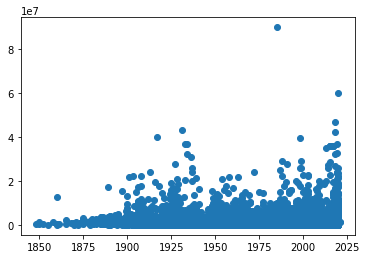

In [11]:
plt.scatter(df_year_built["Year built"],df_year_built["Sold Price"])

In [182]:
df = df.dropna(subset=["Year built"])
df = df[
    (df["Year built"] <= 2024) & (df["Year built"] >= 1500)
]
df.describe()

,Id,Sold Price,Year built,Lot,Bathrooms,Full bathrooms,Total interior livable area,Total spaces,Garage spaces,Elementary School Score,Elementary School Distance,Middle School Score,Middle School Distance,High School Score,High School Distance,Tax assessed value,Annual tax amount,Listed Price,Last Sold Price,Zip
count,46163.000000,4.616300e+04,46163.000000,3.303000e+04,43489.000000,39178.000000,4.454500e+04,46015.000000,46014.000000,41471.000000,41612.000000,30113.000000,30114.000000,41131.000000,41333.000000,4.301100e+04,42360.000000,4.616300e+04,2.916500e+04,46163.000000
mean,23687.191799,1.302298e+06,1966.127613,2.351372e+05,2.354802,2.091710,5.791817e+03,1.574313,1.498305,5.729546,1.110865,5.317637,1.665793,6.145146,2.347301,7.860778e+05,9956.519476,1.320416e+06,8.079297e+05,93270.310595
std,13679.116184,1.680231e+06,30.961864,1.196582e+07,1.180358,0.952526,8.358634e+05,9.059720,9.012404,2.102960,2.256595,2.002745,2.411660,1.980905,3.497569,1.137557e+06,13621.481475,2.633637e+06,1.164012e+06,2263.644954
min,0.000000,1.005000e+05,1848.000000,0.000000e+00,0.000000,1.000000,1.000000e+00,-15.000000,-15.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,85611.000000
25%,11855.500000,5.779000e+05,1947.000000,4.992000e+03,2.000000,2.000000,1.187000e+03,0.000000,0.000000,4.000000,0.300000,4.000000,0.600000,5.000000,0.800000,2.600055e+05,3537.750000,5.850000e+05,3.400000e+05,90212.000000
50%,23678.000000,9.700000e+05,1967.000000,6.500000e+03,2.000000,2.000000,1.565000e+03,1.000000,1.000000,6.000000,0.500000,5.000000,1.000000,6.000000,1.300000,5.517300e+05,7189.500000,9.500000e+05,6.000000e+05,94112.000000
75%,35504.500000,1.530000e+06,1990.000000,1.045400e+04,3.000000,2.000000,2.140000e+03,2.000000,2.000000,7.000000,1.000000,7.000000,1.800000,8.000000,2.400000,9.391475e+05,12043.250000,1.499000e+06,9.500000e+05,95070.000000
max,47438.000000,9.000000e+07,2021.000000,1.897474e+09,24.000000,17.000000,1.764164e+08,1000.000000,1000.000000,10.000000,57.200000,9.000000,57.200000,10.000000,73.900000,4.590000e+07,552485.000000,4.025320e+08,9.000000e+07,96155.000000


In [183]:
#去除缺失值
df_total = df[["Total spaces","Sold Price"]]
df_total.dropna()
print("去除缺失值后数据量为{}".format(len(df_total)))

#去除异常值
df_total = df_total[(df_total["Total spaces"] > 0) & ((df_total["Total spaces"] <= 100))]
print("去除异常值后数据量为{}".format(len(df_total)))

去除缺失值后数据量为46163
去除异常值后数据量为30554


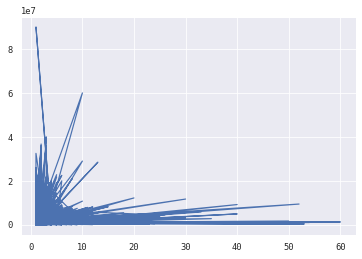

In [184]:
plt.plot(df_total["Total spaces"],df_total["Sold Price"])
plt.show()

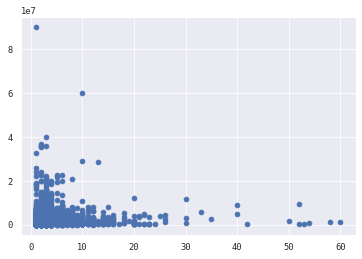

In [185]:
plt.scatter(df_total["Total spaces"],df_total["Sold Price"])
plt.show()

In [186]:
df[df["Total spaces"] >= 10]

,Id,Address,Sold Price,Summary,Type,Year built,Heating,Cooling,Parking,Lot,...,Parking features,Tax assessed value,Annual tax amount,Listed On,Listed Price,Last Sold On,Last Sold Price,City,Zip,State
237,237,13482 Jefferson St,300000.0,A Taste of Country near town! This private an...,SingleFamily,1984.0,"Central, Forced Air, Wood, Fireplace(s)","Central Air, Whole House Fan, Electric","Detached Carport, Direct Access, Driveway, Gra...",43560.0,...,"Detached Carport, Direct Access, Driveway, Gra...",223435.0,2307.0,2019-12-10,299900.0,1999-12-20,159000.0,Le Grand,95333,CA
332,332,23561 Mountain Charlie Rd,3185000.0,This Formal French Country estate with the Fin...,SingleFamily,2007.0,"Heating - 2+ Zones, Fireplace, Central Forced ...","Ceiling Fan, Multi-Zone, Central AC","Garage, Garage - Attached, Garage - Detached, ...",917809.2,...,"Garage, Garage - Attached, Garage - Detached, ...",2838342.0,32006.0,2019-07-16,3599888.0,2003-08-29,900000.0,Los Gatos,95033,CA
400,400,760 E 40th Pl,1930000.0,6% Cap projection! Cash in on the the biggest...,Unknown,2019.0,NaN,NaN,Garage,NaN,...,Garage,520200.0,6997.0,2019-09-06,1999999.0,2018-01-02,500000.0,Los Angeles,90011,CA
535,535,14830 Stetson Rd,1730000.0,The Enchanted Forest is a wonderful family com...,SingleFamily,1950.0,"Other, Propane / Butane, Wood / Pellet",None,"Carport, Covered",1960635.6,...,"Carport, Covered",80631.0,1667.0,2019-11-26,1780000.0,NaN,NaN,Los Gatos,95033,CA
987,987,2690 S Villa Ave,555000.0,Own a piece of history! Magnolia Manor Mansio...,SingleFamily,1885.0,Central,Central Air,"Driveway, Driveway Level, Garage, Gated",77972.0,...,"Driveway, Driveway Level, Garage, Gated",510000.0,5518.0,2019-07-08,699900.0,2012-10-12,280000.0,Palermo,95968,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46736,46736,33 Bridge Rd,942000.0,Unique residential & income property consistin...,MultiFamily,1950.0,NaN,NaN,"Garage - Attached, Off-street, Covered",NaN,...,"Garage - Attached, Off-street, Covered",286937.0,4324.0,2020-10-09,1150000.0,NaN,NaN,Novato,94945,CA
46945,46945,1414 S Campbell Ave,3500000.0,Great investment and high return income proper...,Unknown,1924.0,NaN,NaN,Garage,NaN,...,Garage,NaN,NaN,2020-10-10,3800000.0,NaN,NaN,Alhambra,91803,CA
47171,47171,3990 Edgehill Ln,225000.0,"OPEN HOUSE this SATURDAY, MAY 18. $820K LOAN A...",SingleFamily,1982.0,"Baseboard, Heat pump, Stove, Electric, Wood / ...","Central, Solar","Garage - Detached, Covered",219978.0,...,"Garage - Detached, Covered",726244.0,7904.0,2018-06-20,1729000.0,NaN,NaN,Santa Ynez,93460,CA
47231,47231,16522 Foothill Blvd,1425000.0,This listing includes 7 parcels which incorpor...,Unknown,1956.0,Forced Air,None,Parking Lot,NaN,...,Parking Lot,66157.0,15996.0,2020-09-03,1600000.0,NaN,NaN,San Leandro,94578,CA


In [13]:
#去除缺失值
df_total = df[["Total interior livable area","Sold Price"]]
df_total.dropna()
print("去除缺失值后数据量为{}".format(len(df_total)))

df_total.describe()

去除缺失值后数据量为47439


,Total interior livable area,Sold Price
count,4.491300e+04,4.743900e+04
mean,5.774587e+03,1.296050e+06
std,8.324363e+05,1.694452e+06
min,1.000000e+00,1.005000e+05
25%,1.187000e+03,5.650000e+05
50%,1.566000e+03,9.600000e+05
75%,2.142000e+03,1.525000e+06
max,1.764164e+08,9.000000e+07


In [14]:
#去除异常值
df_total = df_total[
    (df_total["Total interior livable area"] > df_total["Total interior livable area"].quantile(0.05))
    &
    ((df_total["Total interior livable area"] <= df_total["Total interior livable area"].quantile(0.95)))
]
df_total.describe()

,Total interior livable area,Sold Price
count,40421.000000,4.042100e+04
mean,1707.276638,1.151163e+06
std,629.297447,9.699912e+05
min,797.000000,1.005000e+05
25%,1223.000000,5.820000e+05
50%,1566.000000,9.600000e+05
75%,2060.000000,1.470000e+06
max,3654.000000,3.580000e+07


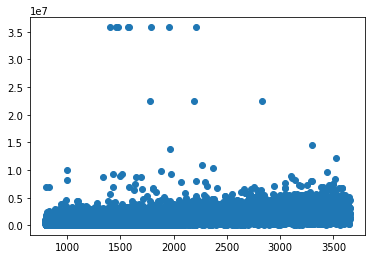

In [15]:
plt.scatter(df_total["Total interior livable area"],df_total["Sold Price"])

In [190]:
df = df.dropna(subset=["Total interior livable area"])
df = df[(df["Total interior livable area"] > df["Total interior livable area"].quantile(0.05)) & ((df["Total interior livable area"] <= df["Total interior livable area"].quantile(0.95)))]
df.describe()

,Id,Sold Price,Year built,Lot,Bathrooms,Full bathrooms,Total interior livable area,Total spaces,Garage spaces,Elementary School Score,Elementary School Distance,Middle School Score,Middle School Distance,High School Score,High School Distance,Tax assessed value,Annual tax amount,Listed Price,Last Sold Price,Zip
count,40063.000000,4.006300e+04,40063.000000,3.015400e+04,38608.000000,34879.000000,40063.000000,40053.000000,40052.000000,36095.000000,36224.000000,26093.000000,26094.000000,35882.000000,36060.000000,3.772800e+04,37127.000000,4.006300e+04,2.558900e+04,40063.000000
mean,23814.010658,1.150958e+06,1966.663430,2.378813e+05,2.294447,2.038906,1706.400544,1.582653,1.509013,5.719241,1.115128,5.339248,1.669150,6.169054,2.377643,6.847820e+05,8742.531742,1.134417e+06,7.264058e+05,93391.151711
std,13677.684899,9.695666e+05,30.210127,1.242412e+07,0.876157,0.732582,626.752035,9.641310,9.611010,2.077772,2.297818,1.985662,2.467302,1.952150,3.565381,6.251874e+05,7522.403147,8.418149e+05,6.442025e+05,2236.094719
min,1.000000,1.005000e+05,1848.000000,0.000000e+00,0.000000,1.000000,799.000000,-15.000000,-15.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,85611.000000
25%,11990.500000,5.850000e+05,1948.000000,4.991000e+03,2.000000,2.000000,1223.000000,0.000000,0.000000,4.000000,0.300000,4.000000,0.600000,5.000000,0.800000,2.526638e+05,3430.000000,5.900000e+05,3.400000e+05,90301.000000
50%,23834.000000,9.600000e+05,1968.000000,6.392500e+03,2.000000,2.000000,1566.000000,2.000000,2.000000,6.000000,0.500000,5.000000,1.000000,6.000000,1.300000,5.416365e+05,7062.000000,9.490000e+05,5.990000e+05,94118.000000
75%,35671.500000,1.469250e+06,1989.000000,9.670000e+03,3.000000,2.000000,2060.000000,2.000000,2.000000,7.000000,0.900000,7.000000,1.800000,8.000000,2.400000,9.064432e+05,11624.000000,1.448888e+06,9.200000e+05,95111.000000
max,47438.000000,3.580000e+07,2021.000000,1.897474e+09,8.000000,7.000000,3648.000000,1000.000000,1000.000000,10.000000,57.200000,9.000000,57.200000,10.000000,73.900000,1.200000e+07,134186.000000,2.500000e+07,3.900000e+07,96155.000000


In [16]:
#去除缺失值
df_list = df[["Listed Price","Sold Price"]]
df_list.dropna()
print("去除缺失值后数据量为{}".format(len(df_list)))

df_list.describe()

去除缺失值后数据量为47439


,Listed Price,Sold Price
count,4.743900e+04,4.743900e+04
mean,1.315890e+06,1.296050e+06
std,2.628695e+06,1.694452e+06
min,0.000000e+00,1.005000e+05
25%,5.745000e+05,5.650000e+05
50%,9.490000e+05,9.600000e+05
75%,1.498844e+06,1.525000e+06
max,4.025320e+08,9.000000e+07


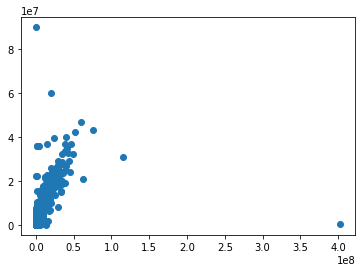

In [17]:
plt.scatter(df_list["Listed Price"],df_list["Sold Price"])

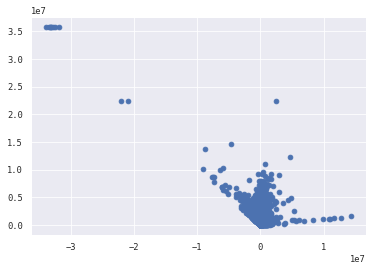

In [193]:
plt.scatter(df_list["Listed Price"]-df_list["Sold Price"],df_list["Sold Price"])
plt.show()

In [ ]:
df = df.dropna(subset=["Listed Price"])
df.describe()

In [19]:
#去除缺失值
df_last = df[["Last Sold Price","Sold Price"]]
df_last = df_last[(df_last["Last Sold Price"] > 0)]
df_last.describe()

,Last Sold Price,Sold Price
count,2.966900e+04,2.966900e+04
mean,8.079626e+05,1.291426e+06
std,1.177945e+06,1.633544e+06
min,1.000000e+00,1.005000e+05
25%,3.350000e+05,5.810000e+05
50%,5.980000e+05,9.700000e+05
75%,9.500000e+05,1.525000e+06
max,9.000000e+07,9.000000e+07


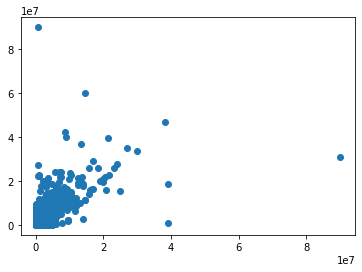

In [20]:
plt.scatter(df_last["Last Sold Price"],df_last["Sold Price"])
plt.show()

In [197]:
print(len(df[(df["Last Sold Price"] > 0)]["Listed Price"]))
print(len(df[(df["Last Sold Price"] > 0)]))

25587
25587


In [21]:
df_copy = copy.deepcopy(df)

df_copy["Last Sold Price"].fillna(df_copy["Listed Price"], inplace=True)
df_copy = df_copy.loc[df_copy["Listed Price"] > 0]
df_copy.loc[df_copy["Last Sold Price"] <= 0, "Last Sold Price"] = df_copy.loc[df_copy["Last Sold Price"] <= 0, "Listed Price"]

df_copy.describe()

,Id,Sold Price,Year built,Lot,Bathrooms,Full bathrooms,Total interior livable area,Total spaces,Garage spaces,Elementary School Score,Elementary School Distance,Middle School Score,Middle School Distance,High School Score,High School Distance,Tax assessed value,Annual tax amount,Listed Price,Last Sold Price,Zip
count,47352.000000,4.735200e+04,46317.000000,3.318900e+04,43900.000000,39551.00000,4.483500e+04,46442.000000,46441.000000,42468.000000,42621.000000,30691.000000,30692.000000,42145.000000,42363.000000,4.370800e+04,43051.000000,4.735200e+04,4.735200e+04,47352.000000
mean,23718.135095,1.297295e+06,1956.614742,2.357593e+05,2.356355,2.09484,5.781590e+03,1.567439,1.491958,5.722144,1.150447,5.318269,1.690555,6.136102,2.406987,7.870345e+05,9965.594225,1.318308e+06,1.020794e+06,93279.708354
std,13694.448204,1.695622e+06,145.917089,1.193746e+07,1.188466,0.96326,8.331601e+05,9.019211,8.971881,2.103607,2.318082,2.002940,2.461038,1.984262,3.583656,1.158604e+06,13893.817257,2.630503e+06,2.419438e+06,2262.848521
min,0.000000,1.005000e+05,0.000000,0.000000e+00,0.000000,1.00000,1.000000e+00,-15.000000,-15.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,3.250000e+02,1.000000e+00,85611.000000
25%,11859.750000,5.650000e+05,1946.000000,4.991000e+03,2.000000,2.00000,1.187000e+03,0.000000,0.000000,4.000000,0.300000,4.000000,0.600000,5.000000,0.800000,2.552322e+05,3473.000000,5.750000e+05,3.950000e+05,90220.000000
50%,23717.500000,9.600000e+05,1967.000000,6.501000e+03,2.000000,2.00000,1.567000e+03,1.000000,1.000000,6.000000,0.500000,5.000000,1.000000,6.000000,1.300000,5.481695e+05,7133.000000,9.490000e+05,7.000000e+05,94114.000000
75%,35579.250000,1.525000e+06,1989.000000,1.045400e+04,3.000000,2.00000,2.142000e+03,2.000000,2.000000,7.000000,1.000000,7.000000,1.800000,8.000000,2.400000,9.379558e+05,12022.000000,1.499000e+06,1.195000e+06,95073.000000
max,47438.000000,9.000000e+07,9999.000000,1.897474e+09,24.000000,17.00000,1.764164e+08,1000.000000,1000.000000,10.000000,57.200000,9.000000,57.200000,10.000000,73.900000,4.590000e+07,552485.000000,4.025320e+08,4.025320e+08,96155.000000


In [22]:
df = copy.deepcopy(df_copy)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47352 entries, 0 to 47438
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           47352 non-null  int64  
 1   Address                      47352 non-null  object 
 2   Sold Price                   47352 non-null  float64
 3   Summary                      47002 non-null  object 
 4   Type                         47352 non-null  object 
 5   Year built                   46317 non-null  float64
 6   Heating                      40909 non-null  object 
 7   Cooling                      36769 non-null  object 
 8   Parking                      46444 non-null  object 
 9   Lot                          33189 non-null  float64
 10  Bedrooms                     44490 non-null  object 
 11  Bathrooms                    43900 non-null  float64
 12  Full bathrooms               39551 non-null  float64
 13  Total interior l

In [204]:
df["Summary"] = df["Summary"].fillna(" ")
def Sentiment_analysis(text):
    s = SnowNLP(text)
    return s.sentiments

df_copy = copy.deepcopy(df)

df_copy["Sentiment"] = df_copy["Summary"].apply(Sentiment_analysis)
df_copy["Summary"]

1        HURRY, HURRY.......Great house 3 bed and 2 bat...
2        'THE PERFECT CABIN TO FLIP!  Strawberry deligh...
3        Rare 2-story Gated 5 bedroom Modern Mediterran...
5        922 E Channel St, Stockton, CA 95202 is a sing...
7        9013 N Valley Rd, Taylorsville, CA 95983 is a ...
                               ...                        
47434    2409 Florence Blvd, Blythe, CA 92225 is a sing...
47435    LOOK AT THIS PRICE $30k PRICE REDUCTION, USE T...
47436    Beautifully restored historic Colonial Revival...
47437    Great opportunity to live in the friendly gate...
47438    This fantastic single story home is on a large...
Name: Summary, Length: 39993, dtype: object

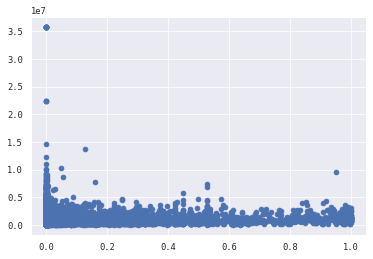

In [205]:
plt.scatter(df_copy["Sentiment"],df_copy["Sold Price"])
plt.show()

In [206]:
df.head()

,Id,Address,Sold Price,Summary,Type,Year built,Heating,Cooling,Parking,Lot,...,Parking features,Tax assessed value,Annual tax amount,Listed On,Listed Price,Last Sold On,Last Sold Price,City,Zip,State
1,1,1727 W 67th St,505000.0,"HURRY, HURRY.......Great house 3 bed and 2 bat...",SingleFamily,1926.0,Combination,"Wall/Window Unit(s), Evaporative Cooling, See ...","Detached Carport, Garage",4047.0,...,"Detached Carport, Garage",505000.0,6253.0,2019-10-16,525000.0,2019-08-30,328000.0,Los Angeles,90047,CA
2,2,28093 Pine Ave,140000.0,'THE PERFECT CABIN TO FLIP! Strawberry deligh...,SingleFamily,1958.0,Forced air,NaN,0 spaces,9147.0,...,NaN,49627.0,468.0,2019-08-25,180000.0,NaN,180000.0,Strawberry,95375,CA
3,3,10750 Braddock Dr,1775000.0,Rare 2-story Gated 5 bedroom Modern Mediterran...,SingleFamily,1947.0,Central,Central Air,"Detached Carport, Driveway, Garage - Two Door",NaN,...,"Detached Carport, Driveway, Garage - Two Door",1775000.0,20787.0,2019-10-24,1895000.0,2016-08-30,1500000.0,Culver City,90230,CA
5,5,922 E Channel St,221000.0,"922 E Channel St, Stockton, CA 95202 is a sing...",SingleFamily,1905.0,Wall Furnace,Window Unit(s),Carport,3576.0,...,Carport,208080.0,2531.0,2019-10-30,224900.0,2017-12-28,200000.0,Stockton,95202,CA
7,7,9013 N Valley Rd,480000.0,"9013 N Valley Rd, Taylorsville, CA 95983 is a ...",SingleFamily,2005.0,"Forced air, Propane / Butane, Solar",Other,"Carport, Garage - Attached, Covered",1771149.6,...,"Carport, Garage - Attached, Covered",NaN,NaN,2019-10-18,499000.0,NaN,499000.0,Taylorsville,95983,CA


In [208]:
df = df.dropna(subset=["Region"])
Region_price = df.groupby('Region')["Sold Price"].agg(['mean', 'count', 'var'])
Region_price = Region_price.sort_values(by='mean', ascending=False)
print(len(Region_price))
Region_price

917


,mean,count,var
Region,,,
Atherton,5.259447e+06,38,9.395370e+12
Newport Beach,3.804421e+06,35,4.666916e+12
Beverly Hills,3.752664e+06,182,4.941578e+13
Los Altos Hills,3.651147e+06,47,7.233527e+11
Stinson Beach,3.534850e+06,20,2.902047e+12
...,...,...,...
Madeline,1.295000e+05,1,NaN
Mineral,1.225000e+05,1,NaN
Boron,1.221600e+05,5,3.477230e+08


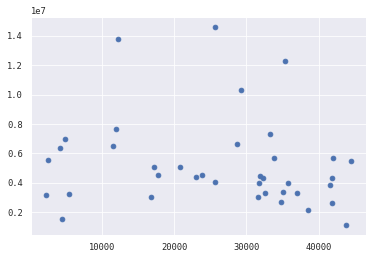

In [64]:
df_atherton = df[df["Region"] == "Atherton"]
plt.scatter(df_atherton["Id"],df_atherton["Sold Price"])
plt.show()

In [209]:
df_atherton["Sold Price"].describe()

count    3.800000e+01
mean     5.259447e+06
std      3.065187e+06
min      1.148000e+06
25%      3.287500e+06
50%      4.442500e+06
75%      6.187500e+06
max      1.460000e+07
Name: Sold Price, dtype: float64

In [215]:
data = df.loc[:,["Sold Price", "Year built", "Total interior livable area", "Listed Price", "Last Sold Price"]]
data.describe()

,Sold Price,Year built,Total interior livable area,Listed Price,Last Sold Price
count,3.999300e+04,39993.000000,39993.000000,3.999300e+04,3.999300e+04
mean,1.151953e+06,1966.658990,1706.489786,1.136403e+06,8.776541e+05
std,9.699476e+05,30.206905,626.772367,8.412112e+05,7.760839e+05
min,1.005000e+05,1848.000000,799.000000,3.250000e+02,5.000000e+02
25%,5.850000e+05,1948.000000,1223.000000,5.950000e+05,3.990000e+05
50%,9.616000e+05,1968.000000,1566.000000,9.498000e+05,7.000000e+05
75%,1.470000e+06,1989.000000,2060.000000,1.449000e+06,1.138000e+06
max,3.580000e+07,2021.000000,3648.000000,2.500000e+07,3.900000e+07


array([[<AxesSubplot:title={'center':'Sold Price'}>,
        <AxesSubplot:title={'center':'Year built'}>],
       [<AxesSubplot:title={'center':'Total interior livable area'}>,
        <AxesSubplot:title={'center':'Listed Price'}>],
       [<AxesSubplot:title={'center':'Last Sold Price'}>, <AxesSubplot:>]],
      dtype=object)

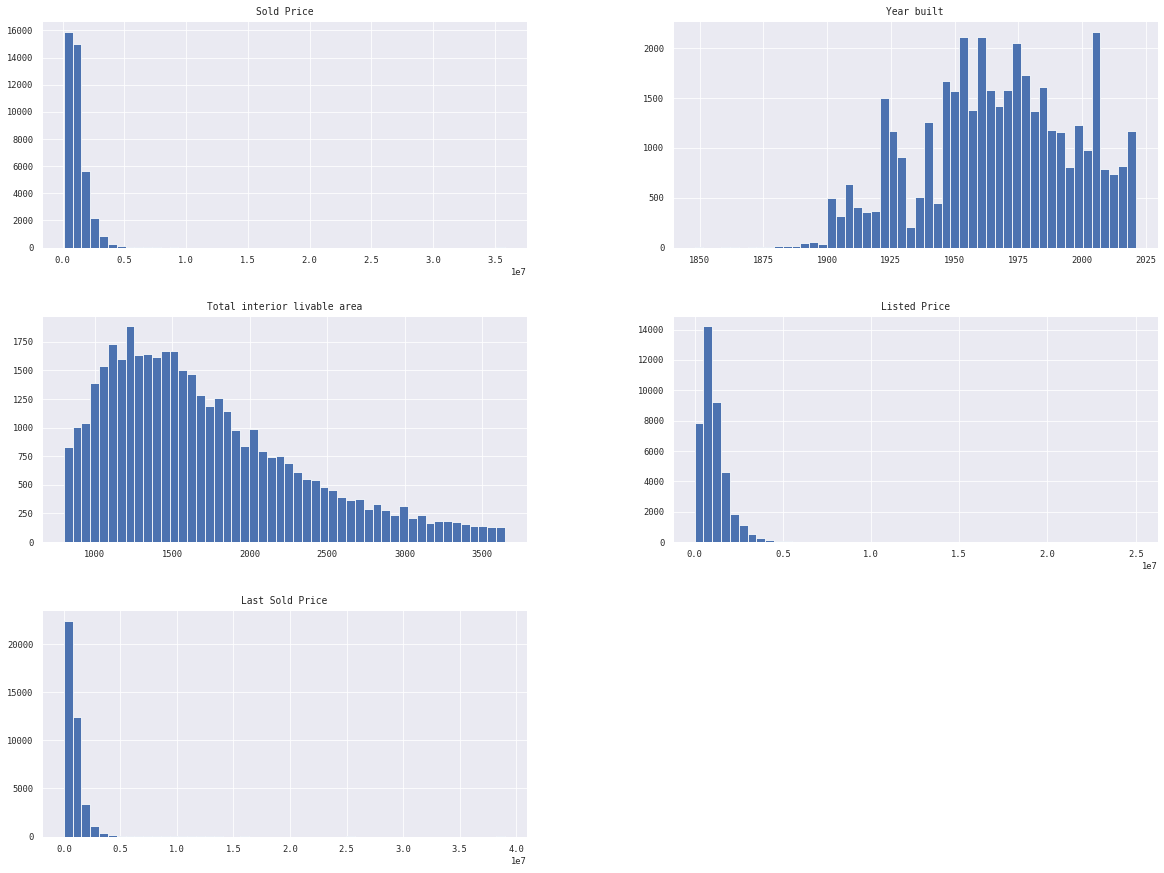

In [216]:
data.hist(bins=50,figsize=(20,15))

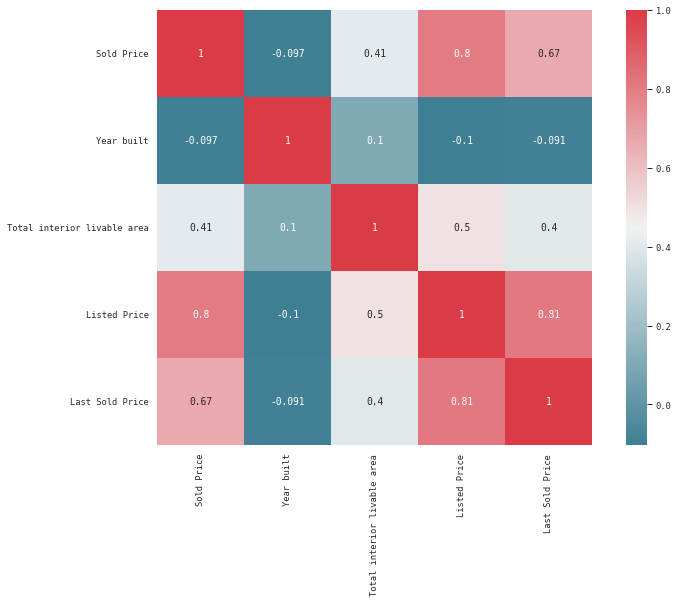

In [217]:
sns.set(context="paper",font="monospace")
housing_corr_matrix = data.corr()  # 注意：这里假设'data'是已经加载好的一个DataFrame
fig, ax = plt.subplots(figsize=(12,8))  # 修改'axe'为'ax'
cmap = sns.diverging_palette(220,10,center = "light", as_cmap=True)
sns.heatmap(housing_corr_matrix, vmax=1, square=True, cmap=cmap, annot=True)
# 显示图形
plt.show()

In [219]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = \
train_test_split(data.iloc[:,1:], data["Sold Price"], test_size=0.2, random_state=100)

In [223]:
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaler2 = StandardScaler()
x_train_norm = scaler1.fit_transform(x_train)
y_train_norm = scaler2.fit_transform(y_train.values.reshape(-1,1))
x_test_norm = scaler1.transform(x_test)
y_test_norm = scaler2.transform(y_test.values.reshape(-1,1))

In [230]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
features = ["Year built", "Total interior livable area", "Listed Price", "Last Sold Price"]
lin_reg = LinearRegression()
lin_reg.fit(x_train_norm,y_train_norm)

y_train_pred = lin_reg.predict(x_train_norm)
mse_train = mean_squared_error(y_train_norm, y_train_pred)
print(f'Mean Squared Error in Train Set: {mse_train}')

y_pred = lin_reg.predict(x_test_norm)
mse_test = mean_squared_error(y_test_norm, y_pred)
print(f'Mean Squared Error in Test Set: {mse_test}')

for f_index,f in enumerate(features):
    print("The importance of {} is {}".format(f,lin_reg.coef_[0][f_index]))

Mean Squared Error in Train Set: 0.36460487046709356
Mean Squared Error in Test Set: 0.2568950439154939
The importance of Year built is -0.016189828108978167
The importance of Total interior livable area is 0.022164489566559864
The importance of Listed Price is 0.7546316544265743
The importance of Last Sold Price is 0.03618544716121655


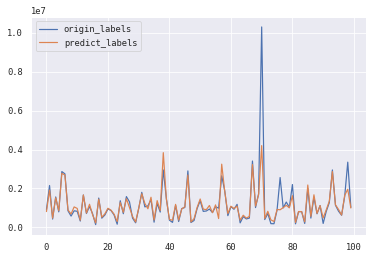

In [231]:
y_test_real = scaler2.inverse_transform(y_test_norm)
y_pred_real = scaler2.inverse_transform(y_pred)

plt.plot(y_test_real[0:100], label='origin_labels')
plt.plot(y_pred_real[0:100], label='predict_labels')
plt.legend()
plt.show()

In [24]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train_norm,y_train_norm)

y_train_pred = tree_reg.predict(x_train_norm).reshape(-1, 1)
mse_train = mean_squared_error(y_train_norm, y_train_pred)
print(f'Mean Squared Error in Train Set: {mse_train}')

y_test_pred = tree_reg.predict(x_test_norm).reshape(-1, 1)
mse_test = mean_squared_error(y_test_norm, y_test_pred)
print(f'Mean Squared Error in Test Set: {mse_test}')

for f_index,f in enumerate(features):
    print("The importance of {} is {}".format(f,tree_reg.feature_importances_[f_index]))

y_test_real = scaler2.inverse_transform(y_test_norm)
y_pred_real = scaler2.inverse_transform(y_test_pred)

plt.plot(y_test_real[0:100], label='origin_labels')
plt.plot(y_pred_real[0:100], label='predict_labels')
plt.legend()
plt.show()

NameError: name 'x_train_norm' is not defined

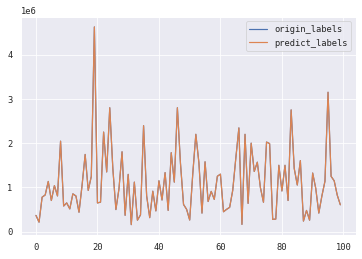

In [240]:
y_train_real = scaler2.inverse_transform(y_train_norm)
y_train_pred_real = scaler2.inverse_transform(y_train_pred)

plt.plot(y_train_real[0:100], label='origin_labels')
plt.plot(y_train_pred_real[0:100], label='predict_labels')
plt.legend()
plt.show()

Mean Squared Error in Train Set: 0.30354551319661754
Mean Squared Error in Test Set: 0.25487637925567164
The importance of Year built is 0.008099373793252278
The importance of Total interior livable area is 0.05003091384125464
The importance of Listed Price is 0.9035053946659495
The importance of Last Sold Price is 0.03836431769954354


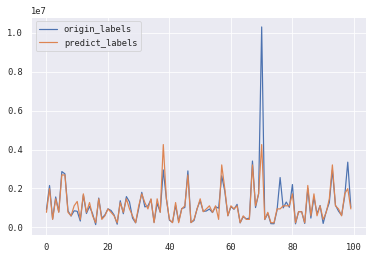

In [245]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=5,max_features=0.9)
tree_reg.fit(x_train_norm,y_train_norm)

y_train_pred = tree_reg.predict(x_train_norm).reshape(-1, 1)
mse_train = mean_squared_error(y_train_norm, y_train_pred)
print(f'Mean Squared Error in Train Set: {mse_train}')

y_test_pred = tree_reg.predict(x_test_norm).reshape(-1, 1)
mse_test = mean_squared_error(y_test_norm, y_test_pred)
print(f'Mean Squared Error in Test Set: {mse_test}')

for f_index,f in enumerate(features):
    print("The importance of {} is {}".format(f,tree_reg.feature_importances_[f_index]))

y_test_real = scaler2.inverse_transform(y_test_norm)
y_pred_real = scaler2.inverse_transform(y_test_pred)

plt.plot(y_test_real[0:100], label='origin_labels')
plt.plot(y_pred_real[0:100], label='predict_labels')
plt.legend()
plt.show()

C:\Users\86187\AppData\Local\Temp\ipykernel_12708\1429780606.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_reg.fit(x_train_norm,y_train_norm)


Mean Squared Error in Train Set: 0.04624564406872255
Mean Squared Error in Test Set: 0.2798800798415272
The importance of Year built is 0.08487007009593175
The importance of Total interior livable area is 0.15001429947326167
The importance of Listed Price is 0.7161339621773645
The importance of Last Sold Price is 0.04898166825344203


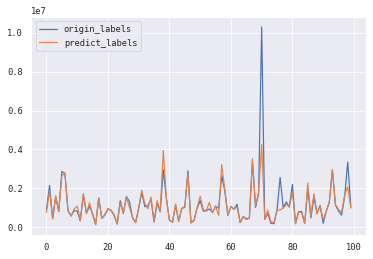

In [248]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(x_train_norm,y_train_norm)

y_train_pred = forest_reg.predict(x_train_norm).reshape(-1, 1)
mse_train = mean_squared_error(y_train_norm, y_train_pred)
print(f'Mean Squared Error in Train Set: {mse_train}')

y_test_pred = forest_reg.predict(x_test_norm).reshape(-1, 1)
mse_test = mean_squared_error(y_test_norm, y_test_pred)
print(f'Mean Squared Error in Test Set: {mse_test}')

for f_index,f in enumerate(features):
    print("The importance of {} is {}".format(f,forest_reg.feature_importances_[f_index]))

y_test_real = scaler2.inverse_transform(y_test_norm)
y_pred_real = scaler2.inverse_transform(y_test_pred)

plt.plot(y_test_real[0:100], label='origin_labels')
plt.plot(y_pred_real[0:100], label='predict_labels')
plt.legend()
plt.show()

C:\Users\86187\AppData\Local\Temp\ipykernel_12708\796720667.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_reg.fit(x_train_norm,y_train_norm)


Mean Squared Error in Train Set: 0.2535286447547965
Mean Squared Error in Test Set: 0.24887406494429742
The importance of Year built is 0.030177896596168593
The importance of Total interior livable area is 0.065194158365905
The importance of Listed Price is 0.8883735523707516
The importance of Last Sold Price is 0.01625439266717483


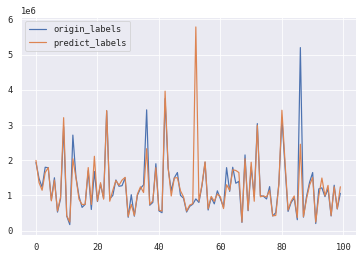

In [251]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators = 100, max_depth = 5)
forest_reg.fit(x_train_norm,y_train_norm)

y_train_pred = forest_reg.predict(x_train_norm).reshape(-1, 1)
mse_train = mean_squared_error(y_train_norm, y_train_pred)
print(f'Mean Squared Error in Train Set: {mse_train}')

y_test_pred = forest_reg.predict(x_test_norm).reshape(-1, 1)
mse_test = mean_squared_error(y_test_norm, y_test_pred)
print(f'Mean Squared Error in Test Set: {mse_test}')

for f_index,f in enumerate(features):
    print("The importance of {} is {}".format(f,forest_reg.feature_importances_[f_index]))

y_test_real = scaler2.inverse_transform(y_test_norm)
y_pred_real = scaler2.inverse_transform(y_test_pred)

plt.plot(y_test_real[100:200], label='origin_labels')
plt.plot(y_pred_real[100:200], label='predict_labels')
plt.legend()
plt.show()

In [259]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators' : [1,3,5],'max_depth' : [3,5,6,9]}
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error')
grid_search.fit(x_train_norm,y_train_norm)
grid_search.best_params_

D:\ProgramFiles\Anaconda\envs\pytorch\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\ProgramFiles\Anaconda\envs\pytorch\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\ProgramFiles\Anaconda\envs\pytorch\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\ProgramFiles\Anaconda\envs\pytorch\lib\site-packages\sklearn\model_selection\_validation

{'max_depth': 5, 'n_estimators': 5}

C:\Users\86187\AppData\Local\Temp\ipykernel_12708\2418016126.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_reg.fit(x_train_norm,y_train_norm)


Mean Squared Error in Train Set: 0.27108136065949295
Mean Squared Error in Test Set: 0.266085523763246
The importance of Year built is 0.013075051541336383
The importance of Total interior livable area is 0.06767460897164061
The importance of Listed Price is 0.9017487301474946
The importance of Last Sold Price is 0.017501609339528428


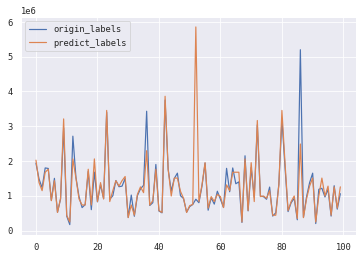

In [260]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators = 5, max_depth = 5)
forest_reg.fit(x_train_norm,y_train_norm)

y_train_pred = forest_reg.predict(x_train_norm).reshape(-1, 1)
mse_train = mean_squared_error(y_train_norm, y_train_pred)
print(f'Mean Squared Error in Train Set: {mse_train}')

y_test_pred = forest_reg.predict(x_test_norm).reshape(-1, 1)
mse_test = mean_squared_error(y_test_norm, y_test_pred)
print(f'Mean Squared Error in Test Set: {mse_test}')

for f_index,f in enumerate(features):
    print("The importance of {} is {}".format(f,forest_reg.feature_importances_[f_index]))

y_test_real = scaler2.inverse_transform(y_test_norm)
y_pred_real = scaler2.inverse_transform(y_test_pred)

plt.plot(y_test_real[100:200], label='origin_labels')
plt.plot(y_pred_real[100:200], label='predict_labels')
plt.legend()
plt.show()

In [261]:
data = df_copy.loc[:,["Sold Price", "Year built", "Total interior livable area", "Listed Price", "Last Sold Price","Sentiment"]]
data.describe()

,Sold Price,Year built,Total interior livable area,Listed Price,Last Sold Price,Sentiment
count,3.999300e+04,39993.000000,39993.000000,3.999300e+04,3.999300e+04,3.999300e+04
mean,1.151953e+06,1966.658990,1706.489786,1.136403e+06,8.776541e+05,2.474062e-02
std,9.699476e+05,30.206905,626.772367,8.412112e+05,7.760839e+05,1.126475e-01
min,1.005000e+05,1848.000000,799.000000,3.250000e+02,5.000000e+02,0.000000e+00
25%,5.850000e+05,1948.000000,1223.000000,5.950000e+05,3.990000e+05,7.144239e-09
50%,9.616000e+05,1968.000000,1566.000000,9.498000e+05,7.000000e+05,2.748253e-06
75%,1.470000e+06,1989.000000,2060.000000,1.449000e+06,1.138000e+06,1.105602e-04
max,3.580000e+07,2021.000000,3648.000000,2.500000e+07,3.900000e+07,9.999995e-01


array([[<AxesSubplot:title={'center':'Sold Price'}>,
        <AxesSubplot:title={'center':'Year built'}>],
       [<AxesSubplot:title={'center':'Total interior livable area'}>,
        <AxesSubplot:title={'center':'Listed Price'}>],
       [<AxesSubplot:title={'center':'Last Sold Price'}>,
        <AxesSubplot:title={'center':'Sentiment'}>]], dtype=object)

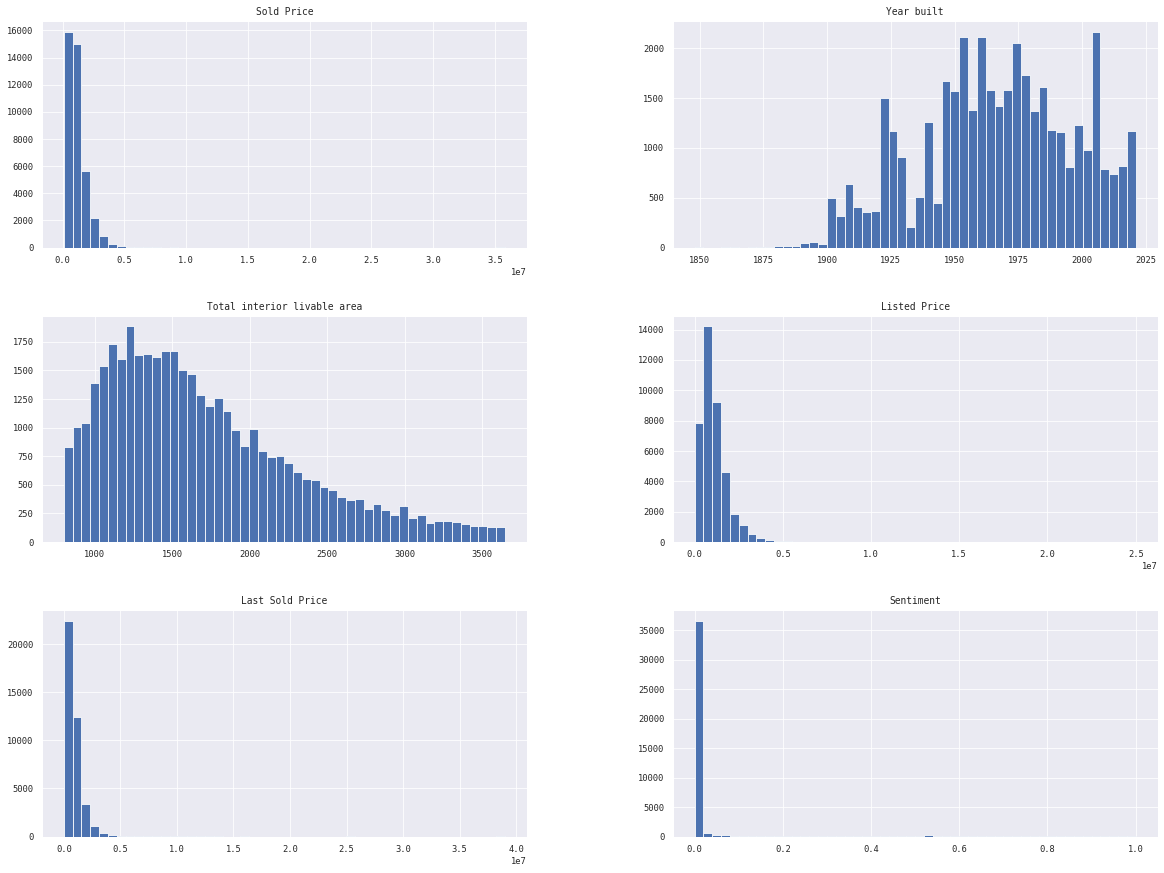

In [262]:
data.hist(bins=50,figsize=(20,15))

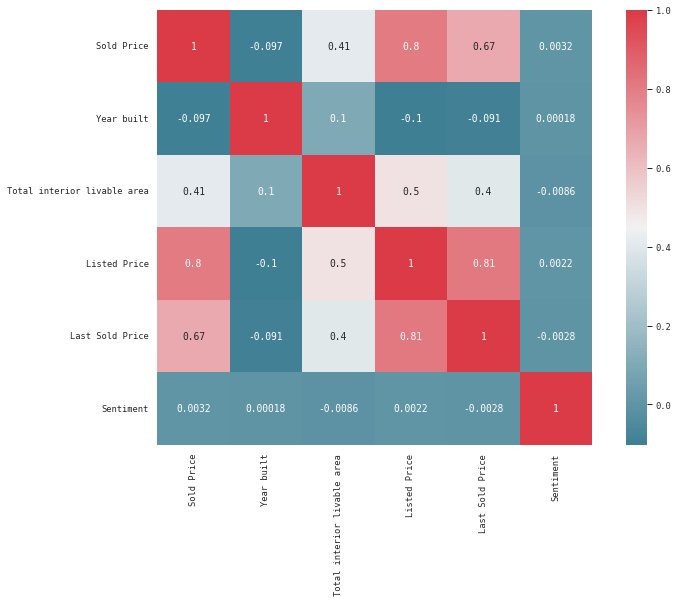

In [263]:
sns.set(context="paper",font="monospace")
housing_corr_matrix = data.corr()  # 注意：这里假设'data'是已经加载好的一个DataFrame
fig, ax = plt.subplots(figsize=(12,8))  # 修改'axe'为'ax'
cmap = sns.diverging_palette(220,10,center = "light", as_cmap=True)
sns.heatmap(housing_corr_matrix, vmax=1, square=True, cmap=cmap, annot=True)
# 显示图形
plt.show()

In [265]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = \
train_test_split(data.iloc[:,1:], data["Sold Price"], test_size=0.2, random_state=100)

from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaler2 = StandardScaler()
x_train_norm = scaler1.fit_transform(x_train)
y_train_norm = scaler2.fit_transform(y_train.values.reshape(-1,1))
x_test_norm = scaler1.transform(x_test)
y_test_norm = scaler2.transform(y_test.values.reshape(-1,1))

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
features = ["Year built", "Total interior livable area", "Listed Price", "Last Sold Price","Sentiment"]
lin_reg = LinearRegression()
lin_reg.fit(x_train_norm,y_train_norm)

y_train_pred = lin_reg.predict(x_train_norm)
mse_train = mean_squared_error(y_train_norm, y_train_pred)
print(f'Mean Squared Error in Train Set: {mse_train}')

y_pred = lin_reg.predict(x_test_norm)
mse_test = mean_squared_error(y_test_norm, y_pred)
print(f'Mean Squared Error in Test Set: {mse_test}')

for f_index,f in enumerate(features):
    print("The importance of {} is {}".format(f,lin_reg.coef_[0][f_index]))

Mean Squared Error in Train Set: 0.3646047449148793
Mean Squared Error in Test Set: 0.2568898691234929
The importance of Year built is -0.016190186272583656
The importance of Total interior livable area is 0.022169739737041894
The importance of Listed Price is 0.7546256048801419
The importance of Last Sold Price is 0.03618930173806181
The importance of Sentiment is 0.0003543692035097752


In [272]:
# 深度学习
df = pd.read_csv("data/train.csv")
df = df.fillna(method = 'bfill',axis = 0).fillna(0)
df.describe()

,Id,Sold Price,Year built,Lot,Bathrooms,Full bathrooms,Total interior livable area,Total spaces,Garage spaces,Elementary School Score,Elementary School Distance,Middle School Score,Middle School Distance,High School Score,High School Distance,Tax assessed value,Annual tax amount,Listed Price,Last Sold Price,Zip
count,47439.000000,4.743900e+04,47439.000000,4.743900e+04,47439.000000,47439.000000,4.743900e+04,47439.000000,47439.000000,47439.000000,47439.000000,47439.000000,47439.000000,47439.00000,47439.000000,4.743900e+04,47439.000000,4.743900e+04,4.743900e+04,47439.000000
mean,23719.000000,1.296050e+06,1956.494614,2.286620e+05,2.354645,2.095575,5.564266e+03,1.574211,1.498999,5.720863,1.159753,5.304264,1.693857,6.13628,2.406929,7.865660e+05,9955.253694,1.315890e+06,8.054828e+05,93279.178587
std,13694.604047,1.694452e+06,146.760945,1.057989e+07,1.182880,0.960678,8.099707e+05,9.149660,9.103554,2.101365,2.343865,2.002256,2.435814,1.98521,3.570415,1.164170e+06,13891.592298,2.628695e+06,1.102411e+06,2263.459104
min,0.000000,1.005000e+05,0.000000,0.000000e+00,0.000000,1.000000,1.000000e+00,-15.000000,-15.000000,1.000000,0.000000,1.000000,0.000000,1.00000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,85611.000000
25%,11859.500000,5.650000e+05,1946.000000,4.965000e+03,2.000000,2.000000,1.187000e+03,0.000000,0.000000,4.000000,0.300000,4.000000,0.600000,5.00000,0.800000,2.549010e+05,3477.000000,5.745000e+05,3.350000e+05,90220.000000
50%,23719.000000,9.600000e+05,1967.000000,6.499000e+03,2.000000,2.000000,1.567000e+03,1.000000,1.000000,6.000000,0.500000,5.000000,1.000000,6.00000,1.300000,5.472960e+05,7128.000000,9.490000e+05,5.950000e+05,94114.000000
75%,35578.500000,1.525000e+06,1989.000000,1.042300e+04,3.000000,2.000000,2.140000e+03,2.000000,2.000000,7.000000,1.000000,7.000000,1.800000,8.00000,2.400000,9.371710e+05,12007.000000,1.498844e+06,9.500000e+05,95073.000000
max,47438.000000,9.000000e+07,9999.000000,1.897474e+09,24.000000,17.000000,1.764164e+08,1000.000000,1000.000000,10.000000,57.200000,9.000000,57.200000,10.00000,73.900000,4.590000e+07,552485.000000,4.025320e+08,9.000000e+07,96155.000000


In [273]:
df['Last Sold On'] = pd.to_datetime(df['Last Sold On'],format = '%Y-%m-%d')
df['Listed On'] = pd.to_datetime(df['Listed On'],format = '%Y-%m-%d')

In [274]:
numeric_features = df.dtypes[df.dtypes == 'float64'].index
df[numeric_features] = df[numeric_features].apply(lambda x:(x-x.mean())/(x.std()))

features = list(numeric_features)
features.append('Type')
print(features)
print(len(features))

['Sold Price', 'Year built', 'Lot', 'Bathrooms', 'Full bathrooms', 'Total interior livable area', 'Total spaces', 'Garage spaces', 'Elementary School Score', 'Elementary School Distance', 'Middle School Score', 'Middle School Distance', 'High School Score', 'High School Distance', 'Tax assessed value', 'Annual tax amount', 'Listed Price', 'Last Sold Price', 'Type']
19


In [277]:
df = df[features]
df = pd.get_dummies(df, dummy_na=True)
df.head()

,Sold Price,Year built,Lot,Bathrooms,Full bathrooms,Total interior livable area,Total spaces,Garage spaces,Elementary School Score,Elementary School Distance,...,Type_Townhouse,"Type_Townhouse, Low-Rise (1-3)",Type_Triplex,"Type_Unit Below, 2 Level, Detached","Type_Unit Below, Flat, Unit Above","Type_Unit Below, Low-Rise (1-3), Full, Unit Above, Attached",Type_Unknown,Type_Vacant Land,Type_VacantLand,Type_nan
0,1.492488,0.085209,-0.021613,-1.990604,-0.099487,-0.006868,-0.172051,-0.164661,0.608717,-0.324145,...,0,0,0,0,0,0,0,0,0,0
1,-0.466847,-0.207784,-0.021230,-0.299815,-0.099487,-0.005793,-0.062758,-0.054814,-1.294807,-0.153487,...,0,0,0,0,0,0,0,0,0,0
2,-0.682256,0.010257,-0.020748,0.545580,-1.140419,-0.005447,-0.172051,-0.164661,1.560480,-0.409474,...,0,0,0,0,0,0,0,0,0,0
3,0.282657,-0.064694,-0.021275,0.545580,0.941444,-0.003645,-0.172051,-0.164661,1.560480,-0.409474,...,0,0,0,0,0,0,0,0,0,0
4,-0.071439,-0.350874,-0.021275,-0.299815,-0.099487,-0.005251,-0.172051,-0.164661,0.132836,3.131685,...,0,0,0,0,0,0,0,0,1,0


In [278]:
df = df.astype(float)

In [279]:
x_train, x_test, y_train, y_test = \
train_test_split(df.iloc[:,1:], df["Sold Price"], test_size=0.2, random_state=100)
x_train.describe()

,Year built,Lot,Bathrooms,Full bathrooms,Total interior livable area,Total spaces,Garage spaces,Elementary School Score,Elementary School Distance,Middle School Score,...,Type_Townhouse,"Type_Townhouse, Low-Rise (1-3)",Type_Triplex,"Type_Unit Below, 2 Level, Detached","Type_Unit Below, Flat, Unit Above","Type_Unit Below, Low-Rise (1-3), Full, Unit Above, Attached",Type_Unknown,Type_Vacant Land,Type_VacantLand,Type_nan
count,37951.000000,37951.000000,37951.000000,37951.000000,37951.000000,37951.000000,37951.000000,37951.000000,37951.000000,37951.000000,...,37951.000000,37951.000000,37951.000000,37951.000000,37951.000000,37951.000000,37951.000000,37951.000000,37951.000000,37951.0
mean,-0.001529,0.001481,-0.003233,-0.003763,0.001146,0.002342,0.002375,-0.000257,-0.000946,0.002643,...,0.053991,0.000026,0.000026,0.000026,0.000026,0.000026,0.034123,0.000158,0.016732,0.0
std,1.020447,1.085076,0.992755,0.989364,1.118037,1.086945,1.087585,0.999595,0.988221,0.998529,...,0.226002,0.005133,0.005133,0.005133,0.005133,0.005133,0.181547,0.012573,0.128268,0.0
min,-13.331167,-0.021613,-1.990604,-1.140419,-0.006868,-1.811457,-1.812369,-2.246569,-0.494803,-2.149708,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,-0.071508,-0.021142,-0.299815,-0.099487,-0.005404,-0.172051,-0.164661,-0.818926,-0.366810,-0.651398,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.071582,-0.020999,-0.299815,-0.099487,-0.004934,-0.062758,-0.054814,0.132836,-0.281481,-0.151961,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.221485,-0.020625,0.545580,-0.099487,-0.004225,0.046536,0.055034,0.608717,-0.068158,0.846913,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,54.800038,179.325654,18.298865,15.514481,217.799020,109.121632,109.682550,2.036361,23.909328,1.845786,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [283]:
x_train.shape

(37951, 176)

In [289]:
import torch
from torch import nn

n_train = x_train.shape[0]
train_features = torch.tensor(x_train.values,dtype = torch.float32)
test_features = torch.tensor(x_test.values,dtype = torch.float32)
train_labels = torch.tensor(y_train.values.reshape(-1,1),dtype = torch.float32)
test_labels = torch.tensor(y_test.values.reshape(-1,1),dtype = torch.float32)

In [323]:
class Net(nn.Module):
    def __init__(self,in_features):
        super().__init__()
        self.net = nn.Sequential(nn.Linear(in_features,256), nn.ReLU(), nn.Linear(256,256),nn.ReLU(), nn.Linear(256,1))

    def forward(self, x):
        return self.net(x)

in_features = x_train.shape[1]
net = Net(in_features)
print(net)

Net(
  (net): Sequential(
    (0): Linear(in_features=176, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=1, bias=True)
  )
)


In [324]:
from torch.utils.data import Dataset,DataLoader

class Dataset_name(Dataset):
    def __init__(self, features,labels):
        self.X = features
        self.y = labels
    def __getitem__(self, index):
        return self.X[index], self.y[index]
    def __len__(self):
        return len(self.X)

train_set = Dataset_name(train_features,train_labels)
test_set = Dataset_name(test_features,test_labels)
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=64, shuffle=True)

In [325]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001,weight_decay=0.001)
epochs = 100
train_loss = []
train_epochs_loss = []
for epoch in range(epochs):
    net.train()
    train_epoch_loss = []
    for idx,(data_x,data_y) in enumerate(train_loader):
        data_x = data_x.to(torch.float32)
        data_y = data_y.to(torch.float32)
        outputs = net(data_x)
        optimizer.zero_grad()
        loss = criterion(data_y,outputs)
        loss.backward()
        optimizer.step()
        train_epoch_loss.append(loss.item())
        train_loss.append(loss.item())
        if idx%(len(train_loader)//2)==0:
            print("epoch={}/{},{}/{}of train, loss={}".format(
                epoch, epochs, idx, len(train_loader),loss.item()))
    train_epochs_loss.append(np.average(train_epoch_loss))

epoch=0/100,0/593of train, loss=3.123992681503296
epoch=0/100,296/593of train, loss=0.0514214001595974
epoch=0/100,592/593of train, loss=0.09912586957216263
epoch=1/100,0/593of train, loss=0.1745753437280655
epoch=1/100,296/593of train, loss=0.04395341873168945
epoch=1/100,592/593of train, loss=0.04027336835861206
epoch=2/100,0/593of train, loss=0.045292340219020844
epoch=2/100,296/593of train, loss=0.5245041847229004
epoch=2/100,592/593of train, loss=0.020336279645562172
epoch=3/100,0/593of train, loss=0.019348911941051483
epoch=3/100,296/593of train, loss=0.042432669550180435
epoch=3/100,592/593of train, loss=0.019374599680304527
epoch=4/100,0/593of train, loss=0.011946652084589005
epoch=4/100,296/593of train, loss=0.0775158703327179
epoch=4/100,592/593of train, loss=0.23267477750778198
epoch=5/100,0/593of train, loss=0.030194859951734543
epoch=5/100,296/593of train, loss=0.02275627665221691
epoch=5/100,592/593of train, loss=0.050282325595617294
epoch=6/100,0/593of train, loss=0.0440

In [309]:
net.eval()
predict = net(test_features).detach().numpy()
print(mean_squared_error(test_labels,predict))

0.20878138


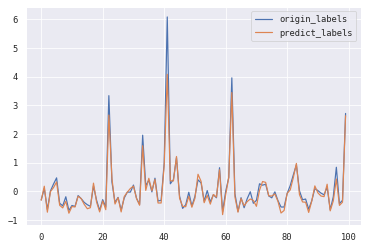

In [310]:
plt.plot(test_labels[100:200], label='origin_labels')
plt.plot(predict[100:200], label='predict_labels')
plt.legend()
plt.show()

Mean Squared Error in Train Set: 0.19907051724227565
Mean Squared Error in Test Set: 0.2253371253369074
The importance of Sold Price is 0.0
The importance of Year built is 0.0
The importance of Lot is 0.003166393424730255
The importance of Bathrooms is 0.0
The importance of Full bathrooms is 0.027832831290841454
The importance of Total interior livable area is 0.0
The importance of Total spaces is 0.0
The importance of Garage spaces is 0.0027757512324531274
The importance of Elementary School Score is 4.1293218371792375e-05
The importance of Elementary School Distance is 0.0
The importance of Middle School Score is 0.0
The importance of Middle School Distance is 0.0009305323376435135
The importance of High School Score is 0.009978752419222175
The importance of High School Distance is 0.00939415917980096
The importance of Tax assessed value is 0.0
The importance of Annual tax amount is 0.9394745574869161
The importance of Listed Price is 0.006405729410020785
The importance of Last Sold 

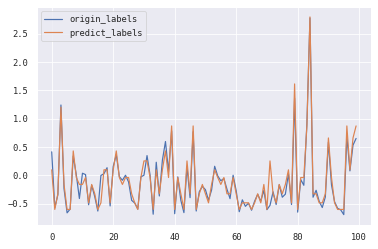

In [314]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=5)
tree_reg.fit(train_features,train_labels)

y_train_pred = tree_reg.predict(train_features).reshape(-1, 1)
mse_train = mean_squared_error(train_labels, y_train_pred)
print(f'Mean Squared Error in Train Set: {mse_train}')

y_test_pred = tree_reg.predict(test_features).reshape(-1, 1)
mse_test = mean_squared_error(test_labels, y_test_pred)
print(f'Mean Squared Error in Test Set: {mse_test}')

for f_index,f in enumerate(features):
    print("The importance of {} is {}".format(f,tree_reg.feature_importances_[f_index]))

# y_test_real = scaler2.inverse_transform(y_test_norm)
# y_pred_real = scaler2.inverse_transform(y_test_pred)

plt.plot(test_labels[0:100], label='origin_labels')
plt.plot(y_test_pred[0:100], label='predict_labels')
plt.legend()
plt.show()